# CS 109A/STAT 121A/AC 209A/CSCI E-109A: Homework 4
# Regularization, High Dimensionality, PCA


**Harvard University**<br/>
**Fall 2017**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, Rahul Dave, Margo Levine

---

### INSTRUCTIONS

- To submit your assignment follow the instructions given in canvas.
- Restart the kernel and run the whole notebook again before you submit. 
- Do not include your name(s) in the notebook if you are submitting as a group. 
- If you submit individually and you have worked with someone, please include the name of your [one] partner below. 

---

Import libraries:

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.api import OLS
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

from sklearn.decomposition import PCA

import seaborn as sns
%matplotlib inline

# Continuing Bike Sharing Usage Data

In this homework, we will focus on multiple linear regression, regularization, dealing with high dimensionality, and PCA. We will continue to build regression models for the Capital Bikeshare program in Washington D.C.  See homework 3 for more information about the data.

*Note: please make sure you use all the processed data from hw3 part (a)...you make want to save the data set on your computer and reread the csv/json file here.


## Part (f): Penalization Methods

As an alternative to selecting a subset of predictors and fitting a regression model on the subset, one can fit a linear regression model on all predictors, but shrink or regularize the coefficient estimates to make sure that the model does not "overfit" the training set. 

Use the following shrinkage techniques to fit linear models to the training set:
- Ridge regression
- Lasso regression
    
You may choose the shrikage parameter $\lambda$ from the set $\{0.001, 0.005,..., 50, 100\}$ using cross-validation. In each case, 

In [4]:
data_train = pd.read_csv('Bikeshare_train.csv')
data_test = pd.read_csv('Bikeshare_test.csv')
data_train = data_train.drop('Unnamed: 0',axis = 1)
data_test = data_test.drop('Unnamed: 0',axis = 1)
data_train.head()

,season,month,holiday,day_of_week,workingday,weather,temp,atemp,humidity,windspeed,count
0,2.0,5.0,0.0,2.0,1.0,2.0,24.0,26.0,76.5833,0.118167,6073.0
1,4.0,12.0,0.0,2.0,1.0,1.0,15.0,19.0,73.3750,0.174129,6606.0
2,2.0,6.0,0.0,4.0,1.0,1.0,26.0,28.0,56.9583,0.253733,7363.0
3,4.0,12.0,0.0,0.0,0.0,1.0,0.0,4.0,58.6250,0.169779,2431.0
4,3.0,9.0,0.0,3.0,1.0,3.0,23.0,23.0,91.7083,0.097021,1996.0


In [5]:
#plt.hist(data_test['weather'])
data_test.describe()

,season,month,holiday,day_of_week,workingday,weather,temp,atemp,humidity,windspeed,count
count,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000
mean,2.442500,6.420000,0.02500,3.115000,0.695000,1.400000,15.577500,18.340000,62.295911,0.190199,4514.21250
std,1.122427,3.531966,0.15632,1.962499,0.460984,0.543819,11.777979,10.538598,14.165383,0.076975,2092.60635
min,1.000000,1.000000,0.00000,0.000000,0.000000,1.000000,-9.000000,-4.000000,0.000000,0.045404,22.00000
25%,1.000000,3.000000,0.00000,2.000000,0.000000,1.000000,5.000000,9.000000,50.774450,0.134957,2875.25000
50%,2.000000,6.000000,0.00000,3.000000,1.000000,1.000000,15.000000,18.000000,62.062500,0.183144,4516.00000
75%,3.000000,10.000000,0.00000,5.000000,1.000000,2.000000,26.000000,28.000000,72.927100,0.232680,6174.75000
max,4.000000,12.000000,1.00000,6.000000,1.000000,3.000000,39.000000,42.000000,94.958300,0.507463,10045.00000


In [6]:
data_train.describe()

,season,month,holiday,day_of_week,workingday,weather,temp,atemp,humidity,windspeed,count
count,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000
mean,2.561934,6.640483,0.033233,2.854985,0.670695,1.389728,17.018127,19.543807,63.385776,0.190833,4598.447130
std,1.094726,3.353974,0.179515,2.048680,0.470672,0.546962,11.192515,9.930991,14.334789,0.078240,1935.319338
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,-11.000000,-6.000000,25.416700,0.022392,431.000000
25%,2.000000,4.000000,0.000000,1.000000,0.000000,1.000000,7.500000,11.000000,52.702900,0.133083,3370.000000
50%,3.000000,7.000000,0.000000,3.000000,1.000000,1.000000,18.000000,21.000000,63.291700,0.178479,4648.000000
75%,4.000000,9.500000,0.000000,5.000000,1.000000,2.000000,26.000000,27.000000,73.500000,0.235380,5981.000000
max,4.000000,12.000000,1.000000,6.000000,1.000000,3.000000,38.000000,39.000000,97.250000,0.421642,8714.000000


In [7]:
data_train = pd.get_dummies(data_train, columns=['season', 'month', 'day_of_week', 'weather'], drop_first=True)
data_test = pd.get_dummies(data_test, columns=['season', 'month', 'day_of_week', 'weather'], drop_first=True)
data_train.head()

,holiday,workingday,temp,atemp,humidity,windspeed,count,season_2.0,season_3.0,season_4.0,...,month_11.0,month_12.0,day_of_week_1.0,day_of_week_2.0,day_of_week_3.0,day_of_week_4.0,day_of_week_5.0,day_of_week_6.0,weather_2.0,weather_3.0
0,0.0,1.0,24.0,26.0,76.5833,0.118167,6073.0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0.0,1.0,15.0,19.0,73.3750,0.174129,6606.0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
2,0.0,1.0,26.0,28.0,56.9583,0.253733,7363.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.0,0.0,0.0,4.0,58.6250,0.169779,2431.0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4,0.0,1.0,23.0,23.0,91.7083,0.097021,1996.0,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [8]:
X_train = data_train.loc[:,(data_train.columns != 'Unnamed: 0') & (data_train.columns != 'count')]
X_test = data_test.loc[:, (data_train.columns != 'Unnamed: 0') & (data_train.columns != 'count')]

y_train = data_train['count']
y_test = data_test['count']


y_train_reg = (y_train-np.mean(y_train))/np.std(y_train)
y_test_reg = (y_test-np.mean(y_test))/np.std(y_test)

X_test.head()

,holiday,workingday,temp,atemp,humidity,windspeed,season_2.0,season_3.0,season_4.0,month_2.0,...,month_11.0,month_12.0,day_of_week_1.0,day_of_week_2.0,day_of_week_3.0,day_of_week_4.0,day_of_week_5.0,day_of_week_6.0,weather_2.0,weather_3.0
0,0.0,1.0,2.0,6.0,56.2083,0.194037,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.0,1.0,1.0,3.0,65.2917,0.350133,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,0.0,1.0,36.0,37.0,56.8333,0.149883,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0.0,1.0,8.0,12.0,49.0833,0.268033,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0.0,0.0,28.0,29.0,69.7083,0.215171,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
ols = LinearRegression(fit_intercept=True)
ols.fit(X_train, y_train_reg)

si= np.argsort(np.abs(ols.coef_))

print(ols.coef_)
print('OLS Train Score', ols.score(X_train, y_train_reg))
print('OLS Test Score', ols.score(X_test, y_test_reg))
print('')
for i,x in enumerate(ols.coef_[si]):
    print(data_train.columns[si[i]], x)
    if abs(x)<.01:
        print(i,x, X_train.columns[i])
        


lambdas = [.001,.005,1,5,10,50,100,500,1000]

clf = RidgeCV(alphas=lambdas, fit_intercept=False, normalize=True)
clf.fit(X_train, y_train_reg)
si= np.argsort(np.abs(clf.coef_))

print("----")
#print(clf.coef_, data_train.columns)
print('Ridge Train Score', clf.score(X_train, y_train_reg))
print('Ridge Test Score', clf.score(X_test, y_test_reg))
print('')
for i,x in enumerate(clf.coef_[si]):
    print(data_train.columns[si[i]], x)
    if abs(x)<.01:
        print(i,x, X_train.columns[i])
        
clfl = LassoCV(cv=10, alphas=lambdas, fit_intercept=False, normalize=False)
preprocessing.StandardScaler()
clfl.fit(X_train, y_train_reg)

print("----")
#print(clf.coef_)
print('Lasso Train Score', clfl.score(X_train, y_train_reg))
print('Lasso Test Score', clfl.score(X_test, y_test_reg))
print('')
si= np.argsort(np.abs(clfl.coef_))
for i,x in enumerate(clfl.coef_[si]):
    print(data_train.columns[si][i], x)
    #if abs(x)<.01:
        #print(i,x, X_train.columns[i])

[-0.14715235  0.15946706  0.04280188  0.01628059 -0.01980086 -1.68741473
  0.46513764  0.53450888  0.63454282  0.04602587  0.12377442  0.17250578
 -0.0340575  -0.40999042 -0.66238418 -0.40182055  0.20965943  0.25163139
  0.05831195 -0.06149669 -0.06404051 -0.10105908  0.08823841  0.03169956
  0.05747633  0.24070924 -0.00857309 -0.81866252]
OLS Train Score 0.576128178313
OLS Test Score 0.219059607719

day_of_week_6.0 -0.00857308951287
0 -0.00857308951287 holiday
atemp 0.0162805912839
humidity -0.0198008641328
day_of_week_3.0 0.0316995601917
month_4.0 -0.0340575010968
temp 0.0428018795108
season_4.0 0.0460258659751
day_of_week_4.0 0.0574763312255
month_10.0 0.0583119507173
month_11.0 -0.0614966917711
month_12.0 -0.0640405096892
day_of_week_2.0 0.0882384103976
day_of_week_1.0 -0.101059082484
month_2.0 0.123774415372
holiday -0.147152351555
workingday 0.159467061197
month_3.0 0.172505783534
month_8.0 0.209659434112
day_of_week_5.0 0.24070923746
month_9.0 0.251631387482
month_7.0 -0.4018205

C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


- How do the estimated coefficients compare to or differ from the coefficients estimated by a plain linear regression (without shrikage penalty) in Part (b)? Is there a difference between coefficients estimated by the two shrinkage methods? If so, give an explantion for the difference.

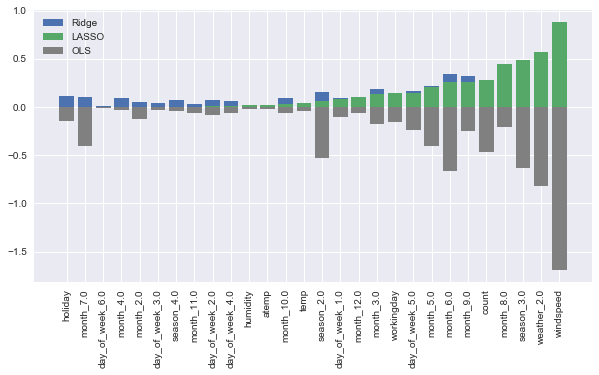

In [10]:
#fig, axes = plt.subplots(2,1,figsize=(10,5))
#fig.subplots_adjust(hspace = -.5, wspace=.3)
plt.figure(figsize=(10,5))
plt.bar(range(len(clf.coef_[si])), (np.abs(clf.coef_[si])), label='Ridge')
plt.bar(range(len(clfl.coef_[si])),(np.abs(clfl.coef_[si])), label='LASSO')

plt.bar(range(len(ols.coef_[si])), -np.abs(ols.coef_[si]), color='grey', label='OLS')

plt.legend()
#axes[0].set_xtick
plt.xticks(range(len(clf.coef_[si])), data_train.columns[si], rotation=90);



- List the predictors that are assigned a coefficient value close to 0 (say < 1e-10) by the two methods. How closely do these predictors match the redundant predictors (if any) identified in Part (c)?
- Is there a difference in the way Ridge and Lasso regression assign coefficients to the predictors `temp` and `atemp`? If so, explain the reason for the difference.

We next analyze the performance of the two shrinkage methods for different training sample sizes:
- Generate random samples of sizes 100, 150, ..., 400 from the training set. You may use the following code to draw a random sample of a specified size from the training set:

In [12]:
#--------  sample
# A function to select a random sample of size k from the training set
# Input: 
#      x (n x d array of predictors in training data)
#      y (n x 1 array of response variable vals in training data)
#      k (size of sample) 
# Return: 
#      chosen sample of predictors and responses

def sample(x, y, k):
    n = x.shape[0] 
    subset_ind = np.random.choice(np.arange(n), k.astype(int))
    x_subset = x[subset_ind, :]
    y_subset = y[subset_ind]   
    return (x_subset, y_subset)

- Fit linear, Ridge and Lasso regression models to each of the generated sample. In each case, compute the $R^2$ score for the model on the training sample on which it was fitted, and on the test set.
- Repeat the above experiment for 10 random trials, and compute the average train and test $R^2$ across the trials for each training sample size. Also, compute the standard deviation (SD) in each case.

In [14]:
sizes = np.linspace(100,400,70)
ols_train_all = []
ols_test_all = []
ridge_train_all = []
ridge_test_all = []
lasso_train_all = []
lasso_test_all = []
ols_train_std = []
ols_test_std = []
ridge_train_std = []
ridge_test_std = []
lasso_train_std = []
lasso_test_std = []

for s in sizes:
    print("Sample size: ", s)
    ols_trials_train = []
    ridge_trials_train = []
    lasso_trials_train = []
    ols_trials_test = []
    ridge_trials_test = []
    lasso_trials_test = []
    for i in range(10):
        spl_x, spl_y = sample(X_train.as_matrix(), y_train, s)
        model = OLS(spl_y, spl_x).fit()
        y_hat_train = model.predict(X_test)
        ols_trials_train.append(r2_score(spl_y, model.predict(spl_x)))
        ols_trials_test.append(r2_score(data_test['count'], y_hat_train))
        clf = RidgeCV(alphas=lambdas, fit_intercept=False)
        clf.fit(spl_x, spl_y)
        ridge_trials_train.append(clf.score(spl_x, spl_y))
        ridge_trials_test.append(clf.score(X_test, (data_test['count'])))
        clf = LassoCV(alphas=lambdas, fit_intercept=False)
        clf.fit(spl_x, spl_y)
        lasso_trials_train.append(clf.score(spl_x, spl_y))
        lasso_trials_test.append(clf.score(X_test, (data_test['count'])))
    ols_train_all.append(np.mean(ols_trials_train))
    ols_test_all.append(np.mean(ols_trials_test))
    ridge_train_all.append(np.mean(ridge_trials_train))
    ridge_test_all.append(np.mean(ridge_trials_test))
    lasso_train_all.append(np.mean(lasso_trials_train))
    lasso_test_all.append(np.mean(lasso_trials_test))
    ols_train_std.append(np.std(ols_trials_train))
    ols_test_std.append(np.std(ols_trials_test))
    ridge_train_std.append(np.std(ridge_trials_train))
    ridge_test_std.append(np.std(ridge_trials_test))
    lasso_train_std.append(np.std(lasso_trials_train))
    lasso_test_std.append(np.std(lasso_trials_test))

C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Sample size:  100.0


C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\line

Sample size:  104.347826087


C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\line

Sample size:  108.695652174


C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\line

Sample size:  113.043478261


C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\line

Sample size:  117.391304348


C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\line

Sample size:  121.739130435


C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\line

Sample size:  126.086956522


C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\line

Sample size:  130.434782609


C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\line

Sample size:  134.782608696


C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\line

Sample size:  139.130434783


C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\line

Sample size:  143.47826087


C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\line

Sample size:  147.826086957


C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\line

Sample size:  152.173913043


C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\line

Sample size:  156.52173913


C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\line

Sample size:  160.869565217


C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\line

Sample size:  165.217391304


C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\line

Sample size:  169.565217391


C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\line

Sample size:  173.913043478


C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\line

Sample size:  178.260869565


C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\line

Sample size:  182.608695652


C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\line

Sample size:  186.956521739


C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\line

Sample size:  191.304347826


C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\line

Sample size:  195.652173913


C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\line

Sample size:  200.0


C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\line

Sample size:  204.347826087


C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\line

Sample size:  208.695652174


C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\line

Sample size:  213.043478261


C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\line

Sample size:  217.391304348


C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\line

Sample size:  221.739130435


C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\line

Sample size:  226.086956522


C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\line

Sample size:  230.434782609


C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\line

Sample size:  234.782608696


C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\line

Sample size:  239.130434783


C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\line

Sample size:  243.47826087


C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\line

Sample size:  247.826086957


C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\line

Sample size:  252.173913043


C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\line

Sample size:  256.52173913


C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\line

Sample size:  260.869565217


C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\line

Sample size:  265.217391304


C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\line

Sample size:  269.565217391


C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\line

Sample size:  273.913043478


C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\line

Sample size:  278.260869565


C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\line

Sample size:  282.608695652


C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\line

Sample size:  286.956521739


C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\line

Sample size:  291.304347826


C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\line

Sample size:  295.652173913


C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\line

Sample size:  300.0


C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\line

Sample size:  304.347826087


C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\line

Sample size:  308.695652174


C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\line

Sample size:  313.043478261


C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\line

Sample size:  317.391304348


C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\line

Sample size:  321.739130435


C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\line

Sample size:  326.086956522


C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\line

Sample size:  330.434782609


C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\line

Sample size:  334.782608696


C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\line

Sample size:  339.130434783


C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\line

Sample size:  343.47826087


C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\line

Sample size:  347.826086957


C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\line

Sample size:  352.173913043


C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\line

Sample size:  356.52173913


C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\line

Sample size:  360.869565217


C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\line

Sample size:  365.217391304


C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\line

Sample size:  369.565217391


C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\line

Sample size:  373.913043478


C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\line

Sample size:  378.260869565


C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\line

Sample size:  382.608695652


C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\line

Sample size:  386.956521739


C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\line

Sample size:  391.304347826


C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\line

Sample size:  395.652173913


C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\line

Sample size:  400.0


C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\line

In [15]:
ols_train_all = np.array(ols_train_all)
ridge_train_all = np.array(ridge_train_all)
lasso_train_all = np.array(lasso_train_all)

- Make a plot of the mean training $R^2$ scores for the linear, Ridge and Lasso regression methods as a function of the training sample size. Also, show a confidence interval for the mean scores extending from **mean - SD** to **mean + SD**. Make a similar plot for the test $R^2$ scores.

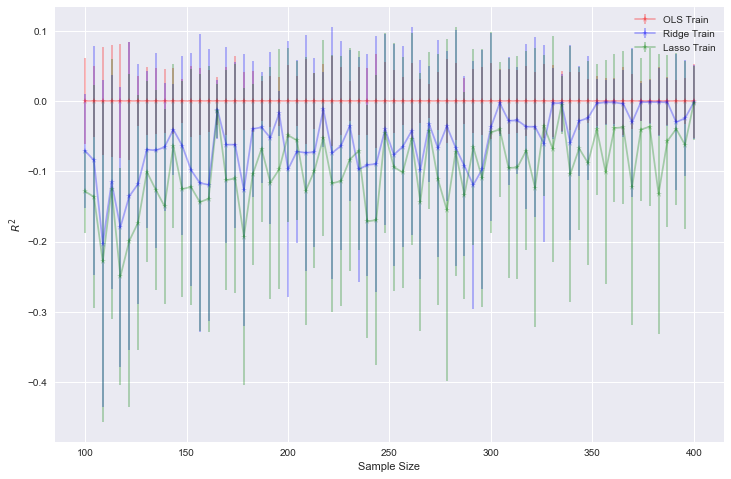

In [16]:
plt.figure(figsize=(12,8))
plt.errorbar(sizes, ols_train_all-ols_train_all, yerr=ols_train_std, alpha=0.3, color='red', fmt='-*', label='OLS Train')
#plt.errorbar(sizes, ols_test_all, yerr=ols_train_std, alpha=0.3, color='red', fmt='-.o', label='OLS Test')
plt.errorbar(sizes, ridge_train_all-ols_train_all, yerr=ridge_train_std,alpha=0.3, color='blue',  fmt='-*', label='Ridge Train')
#plt.errorbar(sizes, ridge_test_all, yerr=ridge_train_std,alpha=0.3, color='blue',  fmt='-.o', label='Ridge Test')
plt.errorbar(sizes, lasso_train_all-ols_train_all, yerr=lasso_train_std, alpha=0.3, color='green', fmt='-*', label='Lasso Train')
#plt.errorbar(sizes, lasso_test_all, yerr=lasso_train_std, alpha=0.3, color='green', fmt='-.o', label='Lasso Test')
plt.legend(loc = 'best')
plt.ylabel('$R^2$')
plt.xlabel('Sample Size')
plt.show()

In [18]:
def smooth(L, window):
    newL = []
    for i in range(len(L)-window):
        newL.append(np.sum(L[i:i+window]))
    return np.array(newL)


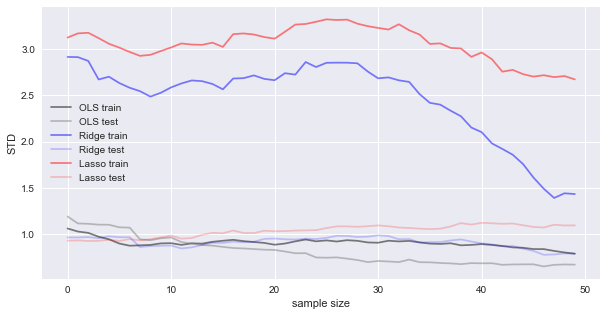

In [19]:
plt.figure(figsize=(10,5))
plt.plot( smooth(ols_train_std, 20), color='black', alpha=0.5,  label='OLS train')
plt.plot( smooth(ols_test_std, 20), color='grey',  alpha=0.5,  label='OLS test')
plt.plot( smooth(ridge_train_std, 20), color='blue', alpha=0.5,  label='Ridge train')
plt.plot( smooth(ridge_test_std, 20), color='blue', alpha=0.2,  label='Ridge test')
plt.plot( smooth(lasso_train_std, 20), color='red', alpha=0.5,  label='Lasso train')
plt.plot( smooth(lasso_test_std, 20), color='red', alpha=0.2,  label='Lasso test')

plt.xlabel('sample size')
plt.ylabel('STD')
plt.legend()

How do the training and test $R^2$ scores compare for the three methods? Give an explanation for your observations. How do the confidence intervals for the estimated $R^2$ change with training sample size? Based on the plots, which of the three methods would you recommend when one needs to fit a regression model using a small training sample?

*Hint:* You may use `sklearn`'s `RidgeCV` and `LassoCV` classes to implement Ridge and Lasso regression. These classes automatically perform cross-validation to tune the parameter $\lambda$ from a given range of values. You may use the `plt.errorbar` function to plot confidence bars for the average $R^2$ scores.

In [20]:
# your code here
sizes = np.linspace(100,400,7)

for size in sizes: 
    print("Sample size: ", size)
    spl_x, spl_y = sample(X_train.as_matrix(), y_train, size)
    model = LinearRegression(fit_intercept=True)
    model.fit(spl_x, spl_y)
    y_hat_test = model.predict(X_test)
    print("OLS train R2: ", r2_score(spl_y, model.predict(spl_x)))
    print("OLS test R2: ", r2_score(data_test['count'], y_hat_test))
    
    
    clf = RidgeCV(alphas=lambdas, fit_intercept=False, normalize=True)
    clf.fit(spl_x, spl_y)
    print("Ridge train R2: ", clf.score(spl_x, spl_y))
    print('Ridge test R2', clf.score(X_test, data_test['count']))

Sample size:  100.0
OLS train R2:  0.78013970895
OLS test R2:  0.056102111607
Ridge train R2:  0.714820767414
Ridge test R2 0.0713159436746
Sample size:  150.0
OLS train R2:  0.628816965086
OLS test R2:  0.209899274917
Ridge train R2:  0.257206374639
Ridge test R2 0.0122033637057
Sample size:  200.0
OLS train R2:  0.654838242928
OLS test R2:  0.236438721736
Ridge train R2:  0.605256937903
Ridge test R2 0.201787104007
Sample size:  250.0
OLS train R2:  0.66969648605
OLS test R2:  0.190548713009
Ridge train R2:  0.634230497632
Ridge test R2 0.138780083072
Sample size:  300.0
OLS train R2:  0.633636922841
OLS test R2:  0.217037284716
Ridge train R2:  0.258657260272
Ridge test R2 0.0408315980375
Sample size:  350.0
OLS train R2:  0.573240732697
OLS test R2:  0.239715053788
Ridge train R2:  0.500415898542
Ridge test R2 0.197704728
Sample size:  400.0
OLS train R2:  0.604980621415
OLS test R2:  0.249005583858
Ridge train R2:  0.552997603778
Ridge test R2 0.221817551594


your answers here

## Part (g): Polynomial & Interaction Terms

Moving beyond linear models, we will now try to improve the performance of the regression model in Part (b) by including higher-order polynomial and interaction terms. 

- For each continuous predictor $X_j$, include additional polynomial terms $X^2_j$, $X^3_j$, and $X^4_j$, and fit a multiple regression model to the expanded training set. How does the $R^2$ of this model on the test set compare with that of the linear model fitted in Part (b)? Using a t-test, find out which of estimated coefficients for the polynomial terms are statistically significant at a significance level of 5%. 

- Fit a multiple linear regression model with additional interaction terms $\mathbb{I}_{month = 12} \times temp$ and $\mathbb{I}_{workingday = 1} \times \mathbb{I}_{weathersit = 1}$ and report the test $R^2$ for the fitted model. How does this compare with the $R^2$ obtained using linear model in Part (b)? Are the estimated coefficients for the interaction terms statistically significant at a significance level of 5%?

In [21]:
# your code here
print(X_train.shape)


cont = ['temp','atemp','humidity','windspeed']
X_binary_only = X_train.drop(['temp','atemp','humidity','windspeed'], axis=1)
X_test_bin_only = X_test.drop(['temp','atemp','humidity','windspeed'], axis=1)
X_poly = X_binary_only.copy()
X_test_poly = X_test_bin_only.copy()
poly = PolynomialFeatures(4, include_bias=False)
for col in cont:
    for i in range(1,5):
        X_poly[col + '_' + str(i)] = X_train[col]**i
        X_test_poly[col + '_' + str(i)] = X_test[col]**i
X_poly.shape

X_poly_test_all = X_test.copy()
X_poly_train_all = X_train.copy()

def add_poly_features(train, test, poly_train, poly_test, polylist):
    for col in polylist:
        for i in range(1,len(polylist)+1):
            poly_train[col + '_' + str(i)] = train[col]**i
            poly_test[col + '_' + str(i)] = test[col]**i

add_poly_features(X_train, X_test, X_poly_train_all, X_poly_test_all,cont)



(331, 28)


In [22]:
model3 = OLS(y_train, X_poly).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     143.5
Date:                Wed, 08 Nov 2017   Prob (F-statistic):          1.73e-167
Time:                        19:17:32   Log-Likelihood:                -2790.9
No. Observations:                 331   AIC:                             5660.
Df Residuals:                     292   BIC:                             5808.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
holiday          -192.3531    364.462     -0.528      0.598    -909.659     524.953
workingday        350.9760    150.373      2.334      0.020      55.023     646.929
season_2.0        748.9518    449.490      1.666      0.097    -135.698    1633.602
season_3.0       1573.9479    518.257      3.037      0.003     553.955    2593.941
season_4.0       1514.5753    465.811      3.251      0.001     597.803    2431.348
month_2.0        -324.3524    408.956     -0.793      0.428   -1129.227     480.522
month_3.0        -301.6811    445.179     -0.678      0.499   -1177.847     574.485
month_4.0        -406.6776    637.219     -0.638      0.524   -1660.801     847.446
month_5.0       -1019.9609    673.289     -1.515      0.131   -2345.076     305.154
month_6.0       -1439.4299    693.827     -2.075      0.039   -2804.966     -73.894
month_7.0       -1407.0204    747.714     -1.882      0.061   -2878.613      64.572
month_8.0       -1709.4169    741.698     -2.305      0.022   -3169.168    -249.666
month_9.0       -1066.0637    659.291     -1.617      0.107   -2363.628     231.500
month_10.0       -924.7756    616.534     -1.500      0.135   -2138.189     288.638
month_11.0       -820.0098    589.872     -1.390      0.166   -1980.950     340.931
month_12.0       -554.3021    478.760     -1.158      0.248   -1496.561     387.957
day_of_week_1.0   -93.6347    155.765     -0.601      0.548    -400.198     212.929
day_of_week_2.0  -133.8464    184.436     -0.726      0.469    -496.838     229.146
day_of_week_3.0   146.3465    194.699      0.752      0.453    -236.845     529.538
day_of_week_4.0    29.5401    187.212      0.158      0.875    -338.917     397.997
day_of_week_5.0   210.2261    181.733      1.157      0.248    -147.447     567.899
day_of_week_6.0   471.2907    246.166      1.915      0.057     -13.195     955.776
weather_2.0        61.0250    195.765      0.312      0.755    -324.265     446.315
weather_3.0     -1051.9346    544.446     -1.932      0.054   -2123.471      19.602
temp_1            627.9128    157.772      3.980      0.000     317.398     938.428
temp_2            -19.8610     13.348     -1.488      0.138     -46.131       6.409
temp_3              0.1900      0.682      0.279      0.781      -1.151       1.531
temp_4             -0.0026      0.011     -0.237      0.813      -0.024       0.019
atemp_1          -674.6272    246.241     -2.740      0.007   -1159.259    -189.996
atemp_2            25.2864     23.950      1.056      0.292     -21.849      72.422
atemp_3            -0.1280      1.075     -0.119      0.905      -2.244       1.988
atemp_4            -0.0025      0.015     -0.165      0.869      -0.032       0.027
humidity_1        345.8755    130.542      2.650      0.008      88.953     602.798
humidity_2         -8.9348      4.363     -2.048      0.041

In [23]:
y_hat_train_poly = model3.predict(X_poly)
y_hat_test_poly = model3.predict(X_test_poly)
print(r2_score(data_test['count'], y_hat_test_poly))

0.287937242582


In [24]:
pvals_poly = dict(model3.pvalues)
coefs_poly = dict(model3.params)
for key, val in pvals_poly.items():
    if val<=.05:
        print(key,val, coefs_poly[key])

workingday 0.0202723298223 350.975974618
season_3.0 0.00260518295044 1573.94785544
season_4.0 0.00128252004902 1514.57530832
month_6.0 0.0388973269076 -1439.42991976
month_8.0 0.0218828303583 -1709.4168628
temp_1 8.7060466153e-05 627.91284956
atemp_1 0.00652787708823 -674.627161938
humidity_1 0.00849921608912 345.875474346
humidity_2 0.0414729055139 -8.93477341817


In [26]:
X_poly_interact = X_poly.copy()
X_test_interact = X_test_poly.copy()
X_poly_interact['Dec_temp'] = X_train['month_12.0'] * X_train['temp']
X_poly_interact['working_sunny'] = ((X_train['workingday']==1.0) * ((X_train['weather_2.0']==0) & (X_train['weather_3.0']==0))).astype(int)
X_test_interact['Dec_temp'] = X_test['month_12.0'] * X_test['temp']
X_test_interact['working_sunny'] = ((X_test['workingday']==1.0) * ((X_test['weather_2.0']==0) & (X_test['weather_3.0']==0))).astype(int)

C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:183: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  unsupported[op_str]))


In [27]:
model4 = OLS(y_train, X_poly_interact).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     135.7
Date:                Wed, 08 Nov 2017   Prob (F-statistic):          2.16e-165
Time:                        19:18:00   Log-Likelihood:                -2790.8
No. Observations:                 331   AIC:                             5664.
Df Residuals:                     290   BIC:                             5819.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
holiday          -176.1195    368.553     -0.478      0.633    -901.497     549.258
workingday        249.5637    243.338      1.026      0.306    -229.369     728.496
season_2.0        748.6514    459.346      1.630      0.104    -155.423    1652.726
season_3.0       1561.8694    544.049      2.871      0.004     491.084    2632.655
season_4.0       1487.2174    504.013      2.951      0.003     495.230    2479.205
month_2.0        -326.0240    415.122     -0.785      0.433   -1143.058     491.010
month_3.0        -310.8262    465.218     -0.668      0.505   -1226.458     604.806
month_4.0        -422.4273    675.021     -0.626      0.532   -1750.989     906.135
month_5.0       -1011.7448    708.399     -1.428      0.154   -2406.000     382.510
month_6.0       -1454.5898    731.674     -1.988      0.048   -2894.655     -14.525
month_7.0       -1422.5544    796.890     -1.785      0.075   -2990.976     145.868
month_8.0       -1718.5812    790.412     -2.174      0.030   -3274.254    -162.909
month_9.0       -1053.0970    724.828     -1.453      0.147   -2479.687     373.493
month_10.0       -884.7589    691.036     -1.280      0.201   -2244.840     475.322
month_11.0       -771.4044    655.648     -1.177      0.240   -2061.837     519.028
month_12.0       -544.3656    514.065     -1.059      0.291   -1556.137     467.406
day_of_week_1.0  -107.9845    158.545     -0.681      0.496    -420.030     204.061
day_of_week_2.0  -148.7226    187.371     -0.794      0.428    -517.503     220.058
day_of_week_3.0   127.6984    199.155      0.641      0.522    -264.274     519.671
day_of_week_4.0    10.7117    191.131      0.056      0.955    -365.468     386.891
day_of_week_5.0   191.6812    185.677      1.032      0.303    -173.765     557.127
day_of_week_6.0   462.7711    248.236      1.864      0.063     -25.802     951.344
weather_2.0       186.5868    308.278      0.605      0.545    -420.159     793.332
weather_3.0      -928.1293    593.371     -1.564      0.119   -2095.990     239.731
temp_1            622.5698    160.204      3.886      0.000     307.260     937.879
temp_2            -19.4939     13.478     -1.446      0.149     -46.021       7.034
temp_3              0.1843      0.684      0.269      0.788      -1.162       1.531
temp_4             -0.0026      0.011     -0.236      0.814      -0.024       0.019
atemp_1          -667.4826    249.681     -2.673      0.008   -1158.900    -176.065
atemp_2            24.9123     24.265      1.027      0.305     -22.846      72.670
atemp_3            -0.1233      1.084     -0.114      0.910      -2.257       2.011
atemp_4            -0.0025      0.015     -0.163      0.871      -0.032       0.027
humidity_1        343.0458    131.035      2.618      0.009      85.145     600.946
humidity_2         -8.8427      4.380     -2.019      0.044

In [28]:
y_hat_train_interact = model4.predict(X_poly_interact)
y_hat_test_interact = model4.predict(X_test_interact)
print(r2_score(data_test['count'], y_hat_test_interact))

0.292562996091


## Part (h): PCA to deal with high dimensionality

We would like to fit a model to include all main effects, polynomial terms up to the $4^{th}$ order, and all interactions between all possible predictors and polynomial terms (not including the interactions between $X^1_j$, $X^2_j$, $X^3_j$, and $X^4_j$ as they would just create higher order polynomial terms).  

- Create an expanded training set including all the desired terms mentioned above.  What are the dimensions of this 'design matrix' of all the predictor variables?   What are the issues with attempting to fit a regression model using all of these predictors?

- Instead of using the usual approaches for model selection, let's instead use principal components analysis (PCA) to fit the model.  First, create the principal component vectors in python (consider: should you normalize first?).  Then fit a 5 different regression models: (1) using just the first PCA vector, (2) using the first two PCA vector s, (3) using the first three PCA vectors, etc...  Briefly summarize how these models compare in the training set.

- Use the test set to decide which of the 5 models above is best to predict out of sample.  How does this model compare to the previous models you've fit?  What are the interpretations of this model's coefficients?

#### Approach

The aim of this problem is to generate a model that includes polynomial terms on the continuous variables as well as interaction terms between all the variables (both continuous and categorical).  If we take all possible interactions that will lead to an inordinate number $\binom{46}{4} + \binom{45}{3} + \binom{44}{2} + \binom{43}{1} = 178364$ interactions.  We aim to decrease this a bit by considering the interactions that we think matter. 

First of all it doesn't make sense to consider polynomial terms of categorical variables (particularly in the one hot encoding form) since they have powers of a binary categorical variable take on the same value of that categorical variable.  Not considering these terms will decrease our total number of variables significantly.  In addition we can approximate our full interaction fit by only worrying about bilateral interactions between variables (i.e. in the universe of interactions between two variables $X_1$ and $Y_1$ $\{X_1Y_1, X_1^2Y_1, X_1Y_1^2, X_1^2Y_1^2 \ldots\}$ only worrying about $X_1Y_1$).

All of these steps decrease our total number of interactions/variables to $\approx 418$. Even with this more manageable augmented set of predictors the total number of features $\gg$ the number of data points.  The assumptions that underly OLS no longer apply and we can expect extreme overfitting at best.  Techniques like Ridge Regression and Lasso won't work well either (although Elastic Net may work well).

In [29]:
# Create dataframe of higher order polynomials on a feature column up to order k
def gen_df_higher_orders(df, column, k):    
    poly_model = PolynomialFeatures(k, include_bias=False)  
    feature_data = df[column]
    higher_orders = poly_model.fit_transform(feature_data.reshape(-1,1))    
    feature_names = poly_model.get_feature_names([column])
    return pd.DataFrame(higher_orders[:,1:], columns = feature_names[1:])

In [119]:
#your code here

# recall our continuous columns
continuous_features = ['temp','atemp','humidity','windspeed']

# Find polynomial features of order 2 interaction only
poly = PolynomialFeatures(2, interaction_only=True)


X_train_pca_int = pd.DataFrame(poly.fit_transform(X_train), 
                               columns = poly.get_feature_names(X_train.columns))

X_test_pca_int = pd.DataFrame(poly.fit_transform(X_test),
                               columns = poly.get_feature_names(X_test.columns))


# generate higher order dfs
higher_order_dfs_train = [gen_df_higher_orders(X_train, feature, 4) for feature in continuous_features]
higher_order_dfs_test = [gen_df_higher_orders(X_test, feature, 4) for feature in continuous_features]

# concatenate to get the full data frames
X_train_pca=pd.concat([X_train_pca_int] + higher_order_dfs_train, axis=1)
X_test_pca = pd.concat([X_test_pca_int] + higher_order_dfs_test, axis=1)

# run PCA for all the components
for component in range(1, 15):
    
    std_scale = preprocessing.MinMaxScaler().fit(X_train_pca)
    pca_train_std = std_scale.transform(X_train_pca)
    pca_test_std = std_scale.transform(X_test_pca)
    
    pca_model = PCA(n_components=component)
    
    
    transformed_scaled_train = pca_model.fit_transform(scale(pca_train_std))
    transformed_scaled_test = pca_model.fit_transform(scale(pca_test_std))
    
    print("Cumulative explained variance:", np.cumsum(np.round(pca_model.explained_variance_ratio_, decimals=5)*100))
    print("R^2 Training: ", ols.fit(transformed_scaled_train, y_train).score(transformed_scaled_train, y_train))
    print("R^2 Test: ", ols.fit(transformed_scaled_test, y_test).score(transformed_scaled_test, y_test))

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':


Cumulative explained variance: [ 7.65]
R^2 Training:  0.112229328548
R^2 Test:  0.179054173292
Cumulative explained variance: [  7.65   13.245]
R^2 Training:  0.114843044585
R^2 Test:  0.18135365652
Cumulative explained variance: [  7.65   13.245  17.783]
R^2 Training:  0.118727084778
R^2 Test:  0.195155638272
Cumulative explained variance: [  7.65   13.245  17.783  21.639]
R^2 Training:  0.119228883938
R^2 Test:  0.198453831428
Cumulative explained variance: [  7.65   13.245  17.783  21.639  25.346]
R^2 Training:  0.119833136936
R^2 Test:  0.227153286583
Cumulative explained variance: [  7.65   13.245  17.783  21.639  25.346  28.755]
R^2 Training:  0.215461533482
R^2 Test:  0.270748437088
Cumulative explained variance: [  7.65   13.245  17.783  21.639  25.346  28.755  31.911]
R^2 Training:  0.220512499793
R^2 Test:  0.304434779601
Cumulative explained variance: [  7.65   13.245  17.783  21.639  25.346  28.755  31.911  35.018]
R^2 Training:  0.240883358586
R^2 Test:  0.318884993214
Cum

In [30]:
model = ols.fit(X_train, y_train)
print("R^2 Training set: ", model.score(X_train, y_train))
print('R^2 Test set: ', model.score(X_test, y_test))

R^2 Training set:  0.576128178313
R^2 Test set:  0.249342111465


PCA is very sensitive to scaling since variables that have larger scale dominate variance and will have outsize impact on the algorithm.  Normalization is important.  Our PCA/OLS process doesn't peak even up to 15 PCA components implying that additional PCA components are still having an impact.  PCA/Regression only starts to match R^2 performance at 15 components.

PCA vectors are orthogonal and linear combinations of the original vectors in X and the betas are the components of the response variables on this basis (the basis that explains the most variance).  We can regenerate the betas for OLS by using the linear transformation back to the basis in the predictor set.

## Part (i): Beyond Squared Error

We have seen in class that the multiple linear regression method optimizes the Mean Squared Error (MSE) on the training set. Consider the following alternate evaluation metric, referred to as the Root Mean Squared Logarthmic Error (RMSLE):

$$
\sqrt{\frac{1}{n}\sum_{i=1}^n (log(y_i+1) - log(\hat{y}_i+1))^2}.
$$

The *lower* the RMSLE the *better* is the performance of a model. The RMSLE penalizes errors on smaller responses more heavily than errors on larger responses. For example, the RMSLE penalizes a prediction of $\hat{y} = 15$ for a true response of $y=10$ more heavily than a prediction of $\hat{y} = 105$ for a true response of $100$, though the difference in predicted and true responses are the same in both cases. 

This is a natural evaluation metric for bike share demand prediction, as in this application, it is more important that the prediction model is accurate on days where the demand is low (so that the few customers who arrive are served satisfactorily), compared to days on which the demand is high (when it is less damaging to lose out on some customers).

The following code computes the RMSLE for you:

In [31]:
#--------  rmsle
# A function for evaluating Root Mean Squared Logarithmic Error (RMSLE)
# of the linear regression model on a data set
# Input: 
#      y_test (n x 1 array of response variable vals in testing data)
#      y_pred (n x 1 array of response variable vals in testing data)
# Return: 
#      RMSLE (float) 

def rmsle(y, y_pred):     
    rmsle = np.sqrt(np.mean(np.square(np.log(y+1) - np.log(y_pred+1))))   
    return rmsle

Use the above code to compute the training and test RMSLE for the polynomial regression model fitted in Part (f). 

You are required to develop a strategy to fit a regression model by optimizing the RMSLE on the training set. Give a justification for your proposed approach. Does the model fitted using your approach yield lower train RMSLE than the model in Part (f)? How about the test RMSLE of the new model? 

**Note:** We do not require you to implement a new regression solver for RMSLE. Instead, we ask you to think about ways to use existing built-in functions to fit a model that performs well on RMSLE. Your regression model may use the same polynomial terms used in Part (f).

In [32]:
# your code here
def log_transform(y):
    return(np.log(y)+1)

## Generate the transformed y's
y_log_train = log_transform(y_train)
y_log_test = log_transform(y_test)
model_poly_rmsle = OLS(y_log_train, X_poly_train_all).fit()
model_poly_rmsle.summary()
model_poly_all = OLS(y_train, X_poly_train_all).fit()
model_poly_all.summary()
y_hat_train_poly_all = model_poly_all.predict(X_poly_train_all)
y_hat_test_poly_all = model_poly_all.predict(X_poly_test_all)
y_hat_log_train_poly_rmsle = model_poly_rmsle.predict(X_poly_train_all)
y_hat_log_test_poly_rmsle = model_poly_rmsle.predict(X_poly_test_all)
y_hat_train_poly_rmsle = np.exp(y_hat_log_train_poly_rmsle - 1)
y_hat_test_poly_rmlse = np.exp(y_hat_log_test_poly_rmsle - 1)

print("rmsle for log transformed model on training set: ", rmsle(y_train, y_hat_train_poly_rmsle))
print("rmsle for log transformed model on test set: ", rmsle(y_test, y_hat_test_poly_rmlse))

print("rmsle for untransformed model on training set: ", rmsle(y_train, y_hat_train_poly_all))
print("rmsle for untransformed model on test set: ", rmsle(y_test, y_hat_test_poly_all))


rmsle for log transformed model on training set:  0.294060221229
rmsle for log transformed model on test set:  0.605644003291
rmsle for untransformed model on training set:  0.349485774123
rmsle for untransformed model on test set:  0.521439775229


C:\Users\ud354317\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


## Part (j): Dealing with Erroneous Labels

Due to occasional system crashes, some of the bike counts reported in the data set have been recorded manually. These counts are not very unreliable and are prone to errors. It is known that roughly 5% of the labels in the training set are erroneous (i.e. can be arbitrarily different from the true counts), while all the labels in the test set were confirmed to be accurate. Unfortunately, the identities of the erroneous records in the training set are not available. Can this information about presence of 5% errors in the training set labels (without details about the specific identities of the erroneous rows) be used to improve the performance of the model in Part (f)? Note that we are interested in improving the $R^2$ performance of the model on the test set (not the training $R^2$ score). 

As a final task, we require you to come up with a strategy to fit a regression model, taking into account the errors in the training set labels. Explain the intuition behind your approach (we do not expect a detailed mathematical justification). Use your approach to fit a regression model on the training set, and compare its test $R^2$ with the model in Part (f).

**Note:** Again, we do not require you to implement a new regression solver for handling erroneous labels. It is sufficient that you to come up with an approach that uses existing built-in functions. Your regression model may use the same polynomial terms used in Part (f).

In [33]:
# your code here

## Recall the poly model w/o transformation
model_poly_all = OLS(y_train, X_poly_train_all).fit()

def remove_outlier(y_data_set, x_data_set):
    
    current_data_set = None
    best_aic = None
    best_index = None
    
    for i in range(len(x_data_set)):
        
        # Get new datasets from dropping the current point
        new_y_set = y_data_set.drop(y_data_set.index[i])
        new_x_set = x_data_set.drop(x_data_set.index[i])
        
        # fit model on new datasets
        current_model = OLS(new_y_set, new_x_set).fit()
        
        # dropping this data results in the best fit
        if (not best_aic) or (best_aic and current_model.aic < best_aic):
            best_aic = current_model.aic
            best_index = i
            current_data_set = (new_y_set, new_x_set)
        
    return(best_index, best_aic, current_data_set)

def remove_all_outliers(y_set, x_set, num_outliers):
    
    model = OLS(y_set, x_set).fit()
    current_data_set = (y_set, x_set)
    current_aic = model.aic

    if num_outliers > 0 and num_outliers < len(X_poly_train_all):
        
        for i in range(num_outliers):
            
            if not current_aic:
                break
                
            (current_index, current_aic, current_data_set) = remove_outlier(current_data_set[0], current_data_set[1])
    
    return(current_data_set)

outliers_gone = remove_all_outliers(y_train, X_poly_train_all, 40)

In [34]:
outliers_gone_model = OLS(outliers_gone[0],outliers_gone[1]).fit()

outliers_gone_model_train_predict = outliers_gone_model.predict(X_poly_train_all)
outliers_gone_model_test_predict = outliers_gone_model.predict(X_poly_test_all)


print("R2 Score for model with outliers removed on training set: ",r2_score(y_train, outliers_gone_model_train_predict))
print("R2 Score for normal model on training set:", r2_score(y_train, y_hat_train_poly_all))

print("R2 Score for model with outliers removed on testing set:",r2_score(y_test, outliers_gone_model_test_predict))
print("R2 Score for normal model on testing set:", r2_score(y_test, y_hat_test_poly_all))



R2 Score for model with outliers removed on training set:  0.505363299591
R2 Score for normal model on training set: 0.669568019178
R2 Score for model with outliers removed on testing set: 0.162333555266
R2 Score for normal model on testing set: 0.287937241792


#### Answer

One potential attempt is to treat this like backwards subselection but on data points instead of predictors. Let's select outliers one by one by finding the data point whose removal results in the best fitting as determined by AIC.  Remove it and repeat until we've removed 20% of points or removing an additional point won't decrease AIC.  Other options include using some other measure such as magnitude of the residual or impact on $R^2$ to determine whether a point is an outlier.  Ideally an answer would evaluate the effect of the data point being removed rather than purely calculating the measure (e.g. magnitude of residual) of the data point.

# APCOMP209a - Homework Question



##  Question 1: Student's t MLE

Use Maximum Likelihood Estimation to generate a linear regression model on the data provided in ``beerdata.csv`` considering two statistical models for noise: a) iid Normal and b) iid Student's t-distribution with $\nu=5$ and scale factor σ=0.5.  

Compare the two models performances and comment why it is perhaps appropriate to use the Student's t-distribution instead of the Normal? 





HINTS:
1. Use the probability density function for the Student's t distribution  with location μ and scale factor σ.
2. If the MLE regressions coefficients can not be derived analytically consider numerical methods.
3. You can use sklearn or statsmodel for the Normal case 




#### Answer

The density for the univariate student's t distribution is given by 

$$ p(t|\mu, \sigma, \nu) = \frac{\frac{\Gamma(\nu +1)}{2}}{\Gamma(\frac{\nu}{2})\sqrt{\pi\nu\sigma^2}}\left(1 + \frac{1}{\nu}\frac{t^2}{\sigma^2}\right)^{-\frac{\nu + 1}{2}}$$

For a linear regression assuming noise is distributed as iid student's t-distribution then we have 

$$\begin{aligned}
    p(\epsilon) &= \prod_i p(\epsilon_i)\\
                &= \prod_i p(y_i - \beta_1x_i - \beta_0)\\
                &= \prod_i \frac{\frac{\Gamma(\nu +1)}{2}}{\Gamma(\frac{\nu}{2})\sqrt{\pi\nu\sigma^2}}\left(1 + \frac{1}{\nu}\frac{(y_i - \beta_1x_i - \beta_0)^2}{\sigma^2}\right)^{-\frac{\nu + 1}{2}}
 \end{aligned}$$
 
Since we want to maximize this probability, we ca substitute the log-likelihood:

$$ \ell(\nu,\sigma, \beta) = C(\nu, \sigma) -\frac{\nu + 1}{2}\sum_iln\left(1 + \frac{1}{\nu}\frac{(y_i - \beta_1x_i - \beta_0)^2}{\sigma^2}\right)$$

where $C(\nu,\sigma)$ is a constant as it doesn't have any $\beta$ dependence.  Maximizing $\ell(\beta)$ is the same as minimizing:

$$\Omega(\beta)=\frac{\nu + 1}{2}\sum_iln\left(1 + \frac{1}{\nu}\frac{(y_i - \beta_1x_i - \beta_0)^2}{\sigma^2}\right)$$

Unlike the OLS regression case, we can't construct analytically a closed form solution, but we can use this for our cost function and use numerical/computational minimization methods.

In [35]:
beer_df = pd.read_csv('./beerdata.csv')

beer_df.describe()

,Unnamed: 0,x,y
count,30.000000,30.000000,30.000000
mean,14.500000,0.440177,7.460532
std,8.803408,0.298491,1.942686
min,0.000000,0.006531,3.783621
25%,7.250000,0.210233,5.761739
50%,14.500000,0.432952,7.509764
75%,21.750000,0.693451,8.540923
max,29.000000,0.986603,11.937741


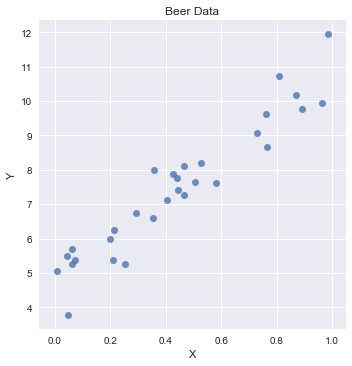

In [36]:
# Basic visualization

sns.lmplot('x','y',  data=beer_df, # Data source
           fit_reg=False)
# Set title
plt.title('Beer Data')

# Set x-axis label
plt.xlabel('X')

# Set y-axis label
plt.ylabel('Y')

In [38]:
## Generate OLS model

X= sm.add_constant(beer_df['x'])
y = beer_df['y']

beer_ols_model = OLS(y,X).fit()

beer_ols_model.summary()

beer_ols_model.params[1]

ols_line_x = np.linspace(0,1,100)
ols_line_y = beer_ols_model.params[1]*ols_line_x + beer_ols_model.params[0]

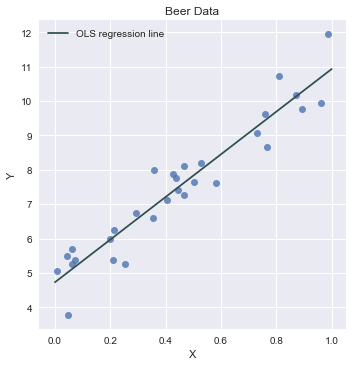

In [39]:
# Basic visualization

sns.lmplot('x','y',  data=beer_df, # Data source
           fit_reg=False)

# Plot Regression Line
plt.plot(ols_line_x, ols_line_y, color='darkslategray', label='OLS regression line')
# Set title
plt.title('Beer Data')

# Set x-axis label
plt.xlabel('X')

# Set y-axis label
plt.ylabel('Y')

plt.legend()

In [40]:
from scipy.stats import t

# student's t cost function
def student_cost(beta, df_x, df_y, degrees=5):
    errors= df_y-np.dot(df_x, beta)
    return(np.sum(-np.log(t.pdf(errors, degrees))))

In [41]:
from scipy.optimize import minimize
cost = lambda x : student_cost(x, df_x=X,df_y=y)
optimal_betas = minimize(cost, beer_ols_model.params, tol=1e-6)
student_line_y = optimal_betas.x[0] + ols_line_x*optimal_betas.x[1]

Our optimal betas are [4.7779, 6.1054].  Let's visualize our student's t regression line.

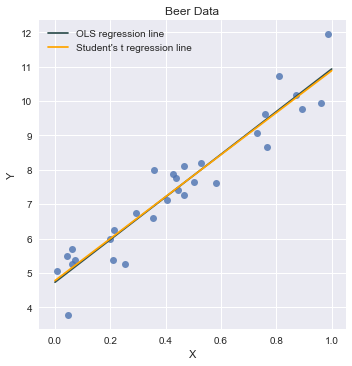

In [42]:
# Basic visualization

sns.lmplot('x','y',  data=beer_df, # Data source
           fit_reg=False)

# Plot Regression Line
plt.plot(ols_line_x, ols_line_y, color='darkslategray', label='OLS regression line')
plt.plot(ols_line_x, student_line_y, color='orange', label='Student\'s t regression line')

# Set title
plt.title('Beer Data')

# Set x-axis label
plt.xlabel('X')

# Set y-axis label
plt.ylabel('Y')

plt.legend()

#### Answers

The two models are very similar and give quite similar regression lines (and beta parameters) which isn't surprising.  The student's t is very similar to a normal except it has "fatter tails" which should in principle make it more robust to outliers. From visual inspection the beer data set doesn't have much in the way of outliers but to the extent that the student-t regression line differs from the OLS regression line it may be due to the student t regression line being less sensitive to some potential outlier points (near (0,0), (1,10) and (1,11) 

## Question 2 (continued from HW2) 

Read sections 1 and 2 of this [paper](https://www.researchgate.net/profile/Roberto_Togneri/publication/45094554_Linear_Regression_for_Face_Recognition/links/09e4150d243bd8b987000000/Linear-Regression-for-Face-Recognition.pdf). 

Briefly, the model leverages the concept that "patterns from a single-object class lie on a linear subspace."   It also makes use of the idea of linear regression as a problem about projections.  In this case, given a vector $y$, the goal is to find the subspace induced by $\mathrm{Col} \, \mathbf X$ that produced the 'closest' projection vector $\widehat y$ to the original $y$.  



### Question 2a

As discussed in the paper, our face dataset contains cleaned images of faces belonging to different people. Assuming that patterns (faces) from one class (person) are elements of the same subspace, let's try to classify an unknown face using the method presented in the paper.  For each class $i$, we need to:

1. construct the $\mathbf H_i$ hat matrix from known faces, being careful to follow the column concatenation step described in the paper to convert an image into its vector representation;
2. calculate the predicted $\widehat y_i$, the closest vector in $\mathrm{Col} \, \mathbf X_i$ to $y$; and
3. calculate the magnitude of the difference vector between $y$ and $\widehat y_i$.

You should then be able to make a classification decision.

**Notes:**
- Use the provided code to download and re-sample the dataset. Note that the `train_dataset` and `train_labels` from the above code should be used to construct the relevant $\mathbf H$ matrices (as you did in HW2). The `test_dataset` is then the dataset of faces for which you do not know the labels (i.e. you are making classification predictions for this dataset). Then the `test_labels` are for you to evaluate your predictions.
- Follow the normalisation step in the paper to ensure the "maximum pixel value is 1".
- Your classifier should have approximately an 80% accuracy.
- Use the image plotting library of matplotlib to display one (or two) correctly classified faces and the known faces.
- Use the image plotting library of matplotlib to display one (or two) incorrectly classified faces and the known faces.
    
### Question 2b - Significant Faces
Select an example of a correctly classified face. Use statsmodels to investigate the most predictive columns (faces) that the model used in this regression:

(i) Which columns (i.e. faces) make the highest contribution to the projection?

(ii) Which columns (i.e. faces) are the least useful in making this projection?

Plot the correctly assigned face, and the two faces from the questions (i) and (ii). What do you notice about these faces?

In [44]:
from io import BytesIO
from zipfile import ZipFile
import urllib
import os

# Note that you may need to run the following command to install Python Image Library (PIL)
#pip install Pillow
from PIL import Image
import numpy as np
from sklearn.cross_validation import train_test_split


In [46]:
# starter functions provided to students
def rgb2gray(rgb):
    '''
    function to convert RGB image to gray scale
    accepts 3D numpy array and returns 2D array with same dimensions
    as the first two dimensions of input
    '''
    
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

def fetch_and_read_data(shape=(50,30)):
    
    '''
    Function to download image data, store in a local folder (note this is 18.4mb), only download the data when
    the local folder is not present, read in the images, downsample them to the specified shape (default = (50x30) (rows x cols))
    and finally split them into a four tuple return object.
    
    Returns:
        - 1) training image data (i.e. images that should form the predictor matrix in your solution)
        - 2) training image data labels (i.e. labels from 1 to 50 that identify which face (1) belongs to)
        - 3) testing image data (i.e. data that you should use to try and classify - note this forms the predictor variable in your regression)
        - 4) testing image data labels (i.e. the labels for (3) - this is to allow you to evaluate your model)
    
    ___________________
    Aside:
    If you want to change the sampling dimensions of your data, pass the shape = (x,y) argument to the method where
    y is the number of columns and x is the number of rows in the image.
    '''
    
    if not os.path.exists('./cropped_faces'):
        url = urllib.request.urlopen("http://www.anefian.com/research/GTdb_crop.zip")
        
        zipfile = ZipFile(BytesIO(url.read()))
        zipfile.extractall()
     
    data = []
    labels = []
    
    files = os.listdir('cropped_faces')
    for f in files:
        if '.jpg' in f:
            image = Image.open('cropped_faces/' + f)
            image = image.resize((shape[1], shape[0]))
            data.append(rgb2gray(np.asarray(image)))
            labels.append(int(f.split('_')[0][1:]) - 1)
            
    data = np.array(data)
    
    trainX, testX, trainY, testY = train_test_split(data, labels, test_size=0.2, stratify=labels)
    return np.array(trainX), np.array(testX), np.array(trainY), np.array(testY)

In [49]:
# starter code for the students
train_dataset, test_dataset, train_labels, test_labels = fetch_and_read_data()
# code to plot some of the images
fig, axes = plt.subplots(2,4,figsize=(10,5))
axes = axes.flatten()
[axes[i].imshow(train_dataset[i], cmap='gray') for i in range(len(axes))]
plt.show()